In [1]:
# !pip install pyecharts
# !pip install pandas-profiling

In [34]:
# setting pyecharts notebook
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

# EDA data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Add Country info

In [36]:
path = "data/ClimateWatch_AllData/ClimateWatch_Adaptation"
adaptation_data = pd.read_csv(os.path.join(path, "CW_adaptation.csv"))

In [37]:
adaptation_data.head()

,country,poverty_year,poverty_14,climate_risks,climate_risks_rank,vulnerability,vulnerability_rank,readiness,readiness_rank,wb_urls,...,hazard_2,hazard_3,hazard_4,hazard_5,hazard_6,hazard_7,hazard_8,hazard_9,hazard_10,hazard_11
0,AFG,2016.0,54.5,37.83,17.0,0.592742,172.0,0.221415,182.0,https://climateknowledgeportal.worldbank.org/c...,...,NaN,YES,YES,YES,NaN,YES,NaN,NaN,NaN,NaN
1,AGO,2018.0,32.3,84.00,87.0,0.504155,132.0,0.251473,173.0,https://climateknowledgeportal.worldbank.org/c...,...,NaN,YES,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,2012.0,14.3,113.50,125.0,0.429632,92.0,0.426645,84.0,https://climateknowledgeportal.worldbank.org/c...,...,YES,YES,NaN,YES,NaN,YES,YES,NaN,NaN,NaN
3,AND,NaN,NaN,NaN,NaN,NaN,NaN,0.399961,99.0,https://climateknowledgeportal.worldbank.org/c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,NaN,NaN,156.00,165.0,0.374357,44.0,0.599504,29.0,https://climateknowledgeportal.worldbank.org/c...,...,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
countries = pd.read_excel("data/meta_data/CLASS.xls", header=4).loc[1:, ["Economy", "Code", "Region", "Income group", "Lending category", "Other"]]
countries = countries.dropna(subset=["Code"])
countries.head()

,Economy,Code,Region,Income group,Lending category,Other
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
3,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD,NaN
4,American Samoa,ASM,East Asia & Pacific,Upper middle income,..,NaN
5,Andorra,AND,Europe & Central Asia,High income,..,NaN


In [39]:
adaptation = pd.merge(adaptation_data, countries, left_on="country", right_on="Code")

In [40]:
adaptation.groupby("Income group").mean()

,poverty_year,poverty_14,climate_risks,climate_risks_rank,vulnerability,vulnerability_rank,readiness,readiness_rank
Income group,,,,,,,,
High income,2017.583333,15.980556,98.213148,99.444444,0.360288,40.763636,0.595661,37.180328
Low income,2013.814815,49.933333,88.851923,90.461538,0.565977,158.592593,0.259768,164.392857
Lower middle income,2015.260000,28.252000,82.885417,81.479167,0.491966,122.729167,0.335329,130.102041
Upper middle income,2016.047619,23.111905,92.266600,92.180000,0.418659,79.529412,0.404809,97.814815


<AxesSubplot:xlabel='poverty_14', ylabel='readiness'>

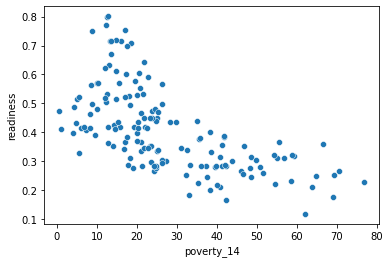

In [41]:
sns.scatterplot(data=adaptation, x="poverty_14", y="readiness")

## Emission

In [42]:
path = "data/ClimateWatch_AllData/ClimateWatch_HistoricalEmissions"
emission_data = pd.read_csv(os.path.join(path, "CW_HistoricalEmissions_CAIT.csv"))

tidy_data = emission_data.melt(["Country", "Source", "Sector", "Gas"], var_name="year", value_name="Gt")


In [43]:
total_ghg_by_countries = emission_data.loc[(emission_data["Sector"] == "Total excluding LUCF") & (emission_data["Gas"] == "All GHG")]

In [44]:
all_ghg_data = pd.merge(total_ghg_by_countries, countries, left_on = "Country", right_on="Code")

In [45]:
ghg_by_income_group = all_ghg_data.groupby("Income group").sum()
ghg_by_income_group

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Income group,,,,,,,,,,,,,,,,,,,,,
High income,14204.121581,14181.446637,14217.219864,14293.285992,14515.872027,14719.537248,15119.556895,15358.403259,15327.308767,15368.932411,...,15607.985394,15522.486072,15399.967554,15423.395339,15293.208133,15267.415284,15156.335948,15152.808910,15211.926856,14891.946033
Low income,644.813684,653.925399,649.751484,646.551198,657.977011,662.874887,667.067795,674.495084,697.445876,708.068933,...,930.070824,917.278746,898.026392,890.278523,908.990142,900.171397,932.654833,972.630979,988.756681,1003.169578
Lower middle income,3715.516796,3769.876794,3731.075871,3711.402511,3733.338163,3833.959401,3881.160985,3954.361769,3990.453881,4109.142726,...,5627.534434,5831.594931,6035.831908,6175.931653,6412.760315,6507.052411,6661.948016,6882.507706,7155.669266,7294.012784
Upper middle income,10870.291560,10978.517385,10985.716636,11082.430026,11090.108723,11537.289746,11641.383869,11670.027349,11837.537432,11812.677530,...,19565.475243,20692.746435,21195.155762,21720.582745,21852.503136,21694.771045,21745.873866,22198.553530,22776.430391,23098.478663


In [46]:
from pyecharts import options as opts
from pyecharts.charts import Scatter

c = (
    Scatter()
    .add_xaxis(adaptation_data["poverty_14"].to_list())
    .add_yaxis("readiness", adaptation_data["readiness"].to_list(), label_opts=opts.LabelOpts(is_show=False),)
    .add_yaxis("vulnerability", adaptation_data["vulnerability"].to_list(), label_opts=opts.LabelOpts(is_show=False),)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-VisualMap(Size)"),
        visualmap_opts=opts.VisualMapOpts(type_="size", max_=150, min_=20),
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
    )
)
c.load_javascript()

In [47]:
c.render_notebook()

In [48]:
Scatter().add_dataset(adaptation_data)

In [17]:
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType

es = EffectScatter()
es.add_xaxis(adaptation_data["poverty_14"].to_list()[:4])
es.add_yaxis("korea", adaptation_data["readiness"].to_list()[:4])
es.set_global_opts(
        title_opts=opts.TitleOpts(title="Scatter-VisualMap(Size)"),
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
    )
es.overlap(c)
es.render_notebook()

In [18]:
gas_summary = tidy_data.groupby(["Gas", "year"])["Gt"].sum()
gas_summary = gas_summary.reset_index()
gas_summary = gas_summary.loc[gas_summary["Gas"]!="All GHG"]

In [19]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [21]:
import pyecharts.options as opts
from pyecharts.charts import Line

g = (
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=list(gas_summary["year"].unique()))
)
for gas, df in gas_summary.groupby("Gas"):
    g.add_yaxis(
        series_name=gas,
        y_axis=df["Gt"].to_list(),
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )

g.render_notebook()

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline

tl = Timeline()
tl.add_schema(play_interval=300)
for year in ghg_by_income_group:
    bar = (
        Bar()
        .add_xaxis(ghg_by_income_group.index.tolist())
        .add_yaxis(
            series_name="",
            y_axis=ghg_by_income_group[year].to_list(),
        # label_opts=opts.LabelOpts(is_show=False),
    )
        .set_global_opts(title_opts=opts.TitleOpts("GHG emissions of {}".format(year)))
    )
    tl.add(bar, "{}".format(year))
tl.render_notebook()

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline

tl = Timeline()
tl.add_schema(play_interval=300)
for year, df in gas_summary.groupby("year"):
    bar = (
            Bar()
            .add_xaxis(df["Gas"].to_list())
            .set_global_opts(title_opts=opts.TitleOpts("GHG emissions of {}".format(year)))
    )
    for i, items in enumerate(zip(df["Gas"].to_list(), df["Gt"].to_list())):
        gas, gt = items
        y_axis = [0 for gas in df["Gas"].to_list()]
        y_axis[i] = gt
        bar.add_yaxis(
                    series_name=gas,
                    y_axis=y_axis,
                # label_opts=opts.LabelOpts(is_show=False),
                )

    tl.add(bar, "{}".format(year))
tl.render_notebook()

In [ ]:
gas_summary

In [ ]:
import pyecharts.options as opts
from pyecharts.charts import ThemeRiver

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=themeRiver-basic

目前无法实现的功能:

1、暂时无法设置阴影样式
"""
x_data = list(gas_summary["Gas"].unique())
y_data = gas_summary[["year", "Gt", "Gas"]].values.tolist()

(
    ThemeRiver(init_opts=opts.InitOpts(width="1000px", height="800px"))
    .add(
        series_name=x_data,
        data=y_data,
        singleaxis_opts=opts.SingleAxisOpts(
            pos_top="50", pos_bottom="50", type_="value", max_=2020, min_=1990
        ),
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="line")
    )
    .render_notebook()
)

In [ ]:
?opts.SingleAxisOpts

In [27]:
sector_gas_data = tidy_data[tidy_data["Gas"]!="All GHG"].groupby(["Gas", "Sector", "year"])["Gt"].sum().reset_index()

In [28]:
sector_gas_data

,Gas,Sector,year,Gt
0,CH4,Agriculture,1990,6625.539271
1,CH4,Agriculture,1991,6614.264483
2,CH4,Agriculture,1992,6570.791999
3,CH4,Agriculture,1993,6527.882934
4,CH4,Agriculture,1994,6570.230166
...,...,...,...,...
1285,N2O,Waste,2015,284.076866
1286,N2O,Waste,2016,287.133846
1287,N2O,Waste,2017,289.701400
1288,N2O,Waste,2018,292.268614


In [30]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline

tl = Timeline()
tl.add_schema(play_interval=300)
for year, df in sector_gas_data.groupby("year"):
    bar = (
        Bar()
        .add_xaxis(
            xaxis_data = list(df["Sector"].unique()),
        )
    )
    for key, df in df.groupby("Gas"):
        bar.add_yaxis(
                series_name= key,
                y_axis=df["Gt"].to_list(),
                label_opts=opts.LabelOpts(is_show=False),
                category_gap=10,
        )
    
    bar.set_global_opts(
        title_opts=opts.TitleOpts("GHG emissions of {}".format(year)),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=True,rotate=40)),
        )
    
    tl.add(bar, "{}".format(year))
tl.render_notebook()